<a href="https://colab.research.google.com/github/MoohShadox/MCNN_Training/blob/main/Seance_1_D%C3%A9finition_et_Optimisation_d'un_mod%C3%A8le.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
!pip install torchviz
from torchviz import make_dot
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset

     |████████████████████████████████| 51kB 4.4MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3522 sha256=7efae225aa6cdfb691227bb351f25d1ca14e49e8aae2269534183f67ae2ac47d
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


# Définition d'un modèle

Dans cette partie on va détailler les étapes a suivre dans la conception d'un modèle, ces étapes vont garentir que l'implémentation sous pytorch sera simple et efficace, on va les appliquer par la suite a deux cas concrêts : 

- **L'optimisation d'un modèle d'apprenitssage statistique par maximum de vraisemblance (Max Likelihood)**
- **L'optimisation d'un modèle par minimisation d'un coût**

Donc pour revenir a nos étapes, définir un modèle nécessite de passer par les étapes suivantes : 

1. Définir les données, les paramètres
2. Préciser le calcul de la fonction a optimiser (faut qu'elle soit différentiable sinon la descente de gradient ne va pas fonctionner et il faudra se tourner vers un algorithme évolutionnaire cf mon dernier workshop)
3. Ecrire l'algorithme d'optimisation en précisant ces hyper-paramètres.

C'est flou ? c'est normal c'est a ça que vont servir les examples.

## Utiliser des modules pour encapsuler un modèle

Première des choses on utilise une classe qui s'appelle "module" pour définir un modèle, définir un modèle implique (au moins) de : 

1. Définir un constructeur 
2. Définir une méthode forward qui correspond a "comment le modèle fait une prédiction"

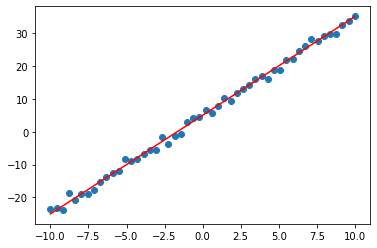

In [7]:
X = np.linspace(-10,10,50).reshape((50,1))
y = 3*X + 5 + 1*np.random.normal(0,1,X.shape)
plt.scatter(X,y)
plt.plot(X,3*X + 5,"red")

In [8]:
class Regression(nn.Module):

    def __init__(self):
        super().__init__()
        self.theta = nn.Parameter(torch.randn(1)) #A l'intérieur d'un module on utilie nn.Parametre pour définir un paramètre.
        self.biais = nn.Parameter(torch.randn(1))
               
    def forward(self, x):
      return self.theta*x + self.biais # a*x + b

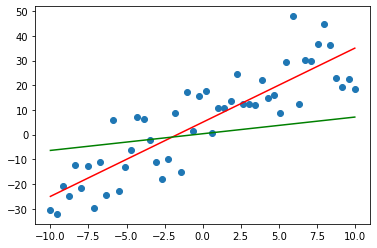

In [88]:
R = Regression()
#(R(X[1]) - y[1])**2
torch.sum((R(X) - y)**2)
#On va commencer par une regression sur un seule attribut parce qu'on peut la visualiser facilement
X = np.linspace(-10,10,50).reshape((50,1))
X = torch.tensor(X).float()
y = 3*X + 5 + 10*np.random.normal(0,1,X.shape)
#La j'affiche le nuage de points
plt.scatter(X,y)
#La j'affiche la droite qui l'a généré et qu'on va essayer de reconstruire
plt.plot(X,3*X + 5,"red")
plt.plot(X ,R(X).detach().numpy(),"green")

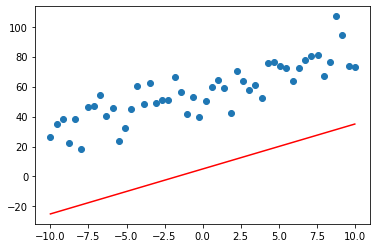

In [99]:
#On va commencer par une regression sur un seule attribut parce qu'on peut la visualiser facilement
X = np.linspace(-10,10,50).reshape((50,1))
X = torch.tensor(X).float()
y = 3*X + 5 + 10*np.random.normal(5,1,X.shape)
#La j'affiche le nuage de points
plt.scatter(X,y)
#La j'affiche la droite qui l'a généré et qu'on va essayer de reconstruire
plt.plot(X,3*X + 5,"red")

In [100]:
#On check que ça marche comme prévu
R = Regression()
for x_t ,y_t in zip(X , y):
  print(R(x_t).shape)
  break

torch.Size([1])


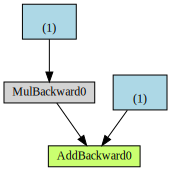

In [101]:
#On peut même print le modèle 
p = R(x_t)
make_dot(p)

In [102]:
t = torch.tensor([1,2,3])
t2 = torch.tensor([[1,2,3]])



In [103]:
R = Regression()

losses = []

optimizer = torch.optim.SGD(R.parameters(), lr=1e-2)


mse_loss = nn.MSELoss(reduction='mean')

for i in range(8000):

    R.train() #ça c'est pour mettre le modèle en mode apprentissage

    p = R(X.float())

    loss = mse_loss( y.float().view( (-1,) ) , p.view((-1,)))


    loss.backward()
    
    losses.append(loss.item())

    optimizer.step()
    optimizer.zero_grad()
  
print("Training loss : ",loss.item())

Training loss :  96.25233459472656


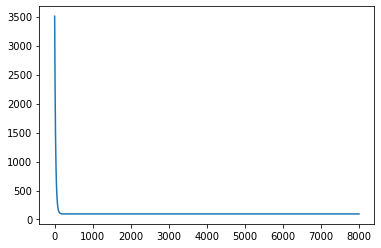

In [104]:
plt.plot(np.arange(len(losses)), losses)

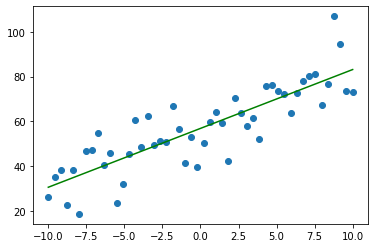

In [105]:
#Voyons voire ce que ça prédit

#ça c'est les points
plt.scatter(X,y)


#ça c'est la "vraie" fonction qui a généré les points (en rouge)
#plt.plot(X,3*X + 5,"red")


#ça c'est ce que le modèle pense (en vert)
plt.plot(X,R(X).detach().numpy(), "green")


In [98]:

list(R.parameters())

[Parameter containing:
 tensor([2.7392], requires_grad=True), Parameter containing:
 tensor([4.5718], requires_grad=True)]

Comme vous pouvez le deviner présenter les modèles sous formes de classe facilite leur modification.

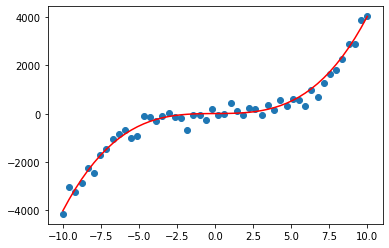

In [117]:
#On va commencer par une regression sur un seule attribut parce qu'on peut la visualiser facilement
X = np.linspace(-10,10,50).reshape((50,1))
X = torch.tensor(X).float()
y = 3*X + 4*X**3 + 5 + 200*np.random.normal(0,1,X.shape)
#La j'affiche le nuage de points
plt.scatter(X,y)
#La j'affiche la droite qui l'a généré et qu'on va essayer de reconstruire
plt.plot(X, 3*X + 4*X**3 + 5,"red")

In [124]:
class Regression_Pol(nn.Module):

    def __init__(self):
        super().__init__()
        self.theta = nn.Parameter(torch.tensor([1.0,2.0,3.0]))
        self.biais = nn.Parameter(torch.randn(1))
               
    def forward(self, x):
      return self.theta[0]*x + self.theta[1]*x**2 + self.theta[2]*x**3 + self.biais

Training loss :  479031.375


[Parameter containing:
 tensor([247.8067], requires_grad=True), Parameter containing:
 tensor([-29.7800], requires_grad=True)]

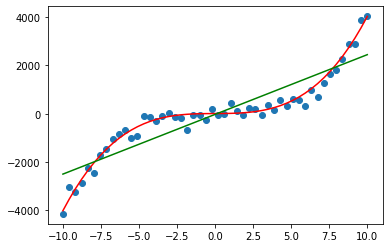

In [122]:
R = Regression()

losses = []

optimizer = torch.optim.SGD(R.parameters(), lr=1e-2)
mse_loss = nn.MSELoss(reduction='mean')

for epoch in range(10000):
    R.train() 
    p = R(X.float())
    loss = mse_loss(y.float().view((-1,)), p.view((-1,)))
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()
  
print("Training loss : ",loss.item())
plt.scatter(X,y)
plt.plot(X,3*X + 4*X**3 + 5,"red")
plt.plot(X,R(X).detach().numpy(), "green")
list(R.parameters())

Training loss :  55176.19921875


[Parameter containing:
 tensor([ 0.9351, -0.4406,  3.9732], requires_grad=True), Parameter containing:
 tensor([-0.3831], requires_grad=True)]

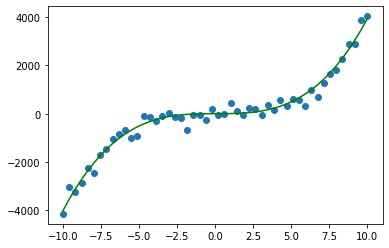

In [126]:
R = Regression_Pol()

losses = []

optimizer = torch.optim.SGD(R.parameters(), lr=1e-7)
mse_loss = nn.MSELoss(reduction='mean')

for epoch in range(10000):
    R.train() 
    p = R(X.float())
    loss = mse_loss(y.float().view((-1,)), p.view((-1,)))
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()
  
print("Training loss : ",loss.item())
plt.scatter(X,y)
#plt.plot(X,3*X + 4*X**3 + 5,"red")
plt.plot(X,R(X).detach().numpy(), "green")
list(R.parameters())

## Et les réseaux de neurones dans tout ça ?

Dans cette partie on va aborder pour la première fois les réseaux de neurones et le meilleur moyen de le faire c'est par l'expérimentation sur : 
[tensorflow playground](https://playground.tensorflow.org/)
et/ou en lisant [cet article](https://medium.com/cracking-the-data-science-interview/a-gentle-introduction-to-neural-networks-for-machine-learning-d5f3f8987786).

Pour résumer la regression précédente est un réseau de neurones a un seul neurone, nous pouvons d'ailleurs la réecrire de façon équivalente comme suit.

In [127]:
X = np.linspace(-10,10,50).reshape((50,1))
X = torch.tensor(X).float()
y = 3*X + 5 + 1*np.random.normal(0,1,X.shape)

class Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1,1)
               
    def forward(self, x):
      return self.l1(x)

Training loss :  0.8210152983665466


[Parameter containing:
 tensor([[2.9909]], requires_grad=True), Parameter containing:
 tensor([5.1513], requires_grad=True)]

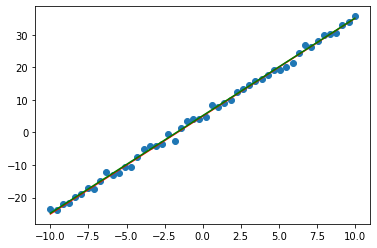

In [128]:
R = Regression()

losses = []

optimizer = torch.optim.SGD(R.parameters(), lr=1e-3)
mse_loss = nn.MSELoss(reduction='mean')

for epoch in range(10000):
    R.train() 
    p = R(X.float())
    loss = mse_loss(y.float().view((-1,)), p.view((-1,)))
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()
  
print("Training loss : ",loss.item())
plt.scatter(X,y)
plt.plot(X,3*X + 5,"red")
plt.plot(X,R(X).detach().numpy(), "green")
list(R.parameters())

In [166]:
X = np.linspace(-10,10,50).reshape((50,1))
X = torch.tensor(X).float()

y = 3*X + 4*X**3 + 5*X**2 + 5 + 200*np.random.normal(0,1,X.shape)

class Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()

        self.l1 = nn.Linear(1,30, bias = True)
        self.l2 = nn.Linear(30,45, bias = True)
        self.out = nn.Linear(45,1, bias = True)
               
    def forward(self, x):
      x = self.relu(self.l1(x))
      x = self.relu(self.l2(x))
      x = self.out(x)
      return x

In [167]:
R = Regression()
torch.mean((R(X[0:10]) - y[0:10])**2)

tensor(5390668.1484, dtype=torch.float64, grad_fn=<MeanBackward0>)

Training loss :  45891.78125


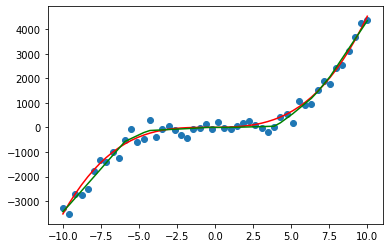

In [171]:
R = Regression()

losses = []

optimizer = torch.optim.SGD(R.parameters(), lr=1e-7)
mse_loss = nn.MSELoss(reduction='mean')

for epoch in range(50000):
    R.train() 
    p = R(X.float())
    loss = mse_loss(y.float().view((-1,)), p.view((-1,)))
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()
  
print("Training loss : ",loss.item())
plt.scatter(X,y)
plt.plot(X,3*X + 4*X**3 + 5*X**2 + 5,"red")
plt.plot(X,R(X).detach().numpy(), "green")


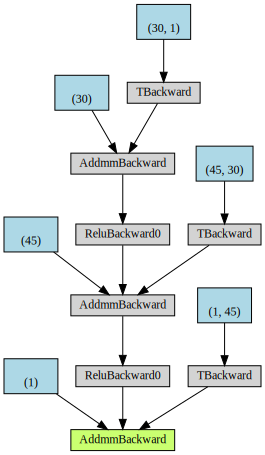

In [172]:
make_dot(R(X))

## Approche par minimisation du coût la plus simple de l'univers : une regréssion linéaire

Un modèle de regréssion linéaire tente de prédire une variable y a partir de plusieurs samples rangés dans une matrice X.

Le nombre de colonnes de X représente le nombre d'attributs.

Le nombre de lignes de X représente le nombre d'exemples.

On génère plusieurs colonnes de données cette fois, 


### Regression de données jouet avec plusieurs attributs


In [200]:
#On génère des données jouet
N_LIGNES = 1000
N_COLONNES = 15
X = np.random.random((N_LIGNES,N_COLONNES))
X = torch.tensor(X)
X.shape

torch.Size([1000, 15])

In [201]:
#On défini un theta_v qui va nous servir a générer un y
theta_v = np.random.randint(0,40,N_COLONNES).reshape((N_COLONNES,1))


theta_v = torch.tensor(theta_v).float()

print(theta_v.shape)
print(theta_v.T)

torch.Size([15, 1])
tensor([[ 5., 15., 13., 20., 11.,  7.,  0., 19.,  0., 18., 22., 30., 24., 13.,
         31.]])


In [202]:
theta_v.shape
theta_v

tensor([[ 5.],
        [15.],
        [13.],
        [20.],
        [11.],
        [ 7.],
        [ 0.],
        [19.],
        [ 0.],
        [18.],
        [22.],
        [30.],
        [24.],
        [13.],
        [31.]])

In [203]:
#On génère les y
y_t = torch.matmul(X.float(),theta_v)+ 12
y = y_t + 2*np.random.normal(0,1,y_t.shape)
y.shape

torch.Size([1000, 1])

In [205]:
class Regression_DNN(nn.Module):

    def __init__(self, n_in):
        super().__init__()
        self.out = nn.Linear(n_in,1, bias = True)
               
    def forward(self, x):
      x = self.out(x)
      return x

In [207]:
R = Regression_DNN( X.shape[1] )

losses = []

optimizer = torch.optim.SGD(R.parameters(), lr=1e-1)
mse_loss = nn.MSELoss(reduction='mean')

for epoch in range(10000):
    R.train()
    p = R(X.float())
    loss = mse_loss(y.float().view((-1,)), p.view((-1,)))
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()
  
print("Training loss : ",loss.item())
print(list(R.parameters()))

Training loss :  4.033421039581299
[Parameter containing:
tensor([[ 4.8847, 15.1012, 12.8458, 19.8059, 11.1886,  7.2667,  0.1732, 19.5006,
          0.2458, 17.8704, 21.7433, 29.8367, 23.7590, 12.8434, 30.8444]],
       requires_grad=True), Parameter containing:
tensor([12.1572], requires_grad=True)]


In [209]:
theta_v.T

tensor([[ 5., 15., 13., 20., 11.,  7.,  0., 19.,  0., 18., 22., 30., 24., 13.,
         31.]])

Un dernier petit point : on peut ajouter une méthode "train".


In [ ]:
class Regression_DNN(nn.Module):
    def __init__(self, n_in):
        super().__init__()
        self.out = nn.Linear(n_in,1, bias = True)
        self.loss =  nn.MSELoss(reduction='mean')
        self.optimizer = torch.optim.Adam(self.parameters(), lr=1e-1)

               
    def forward(self, x):
      x  = x.float()
      x = self.out(x)
      return x

    def train_step(self,X,y):
      self.train() 
      p = self.forward(X.float())
      loss = self.loss(y.float().view((-1,)), p.view((-1,)))
      loss.backward()
      losses.append(loss.item())
      self.optimizer.step()
      self.optimizer.zero_grad()
      return loss

In [ ]:
mod = Regression_DNN(X.shape[1])

losses = []

for epoch in range(10000):
    loss = mod.train_step(X,y)
    losses.append(loss)
  
print("Training loss : ",loss.item())
print(list(mod.parameters()))

Training loss :  3.634453296661377
[Parameter containing:
tensor([[14.1296,  0.4086, 34.1500, 17.2166, 31.8234, 29.6468, 36.0269, 15.4176,
          0.0709, 26.4101,  2.1345, 21.9870, 27.0934, 35.2075,  0.0490]],
       requires_grad=True), Parameter containing:
tensor([11.1183], requires_grad=True)]


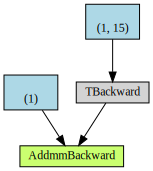

In [ ]:
p = mod(X)
make_dot(p)

## Maximum de vraisemblance pour le modèle le plus simple de l'univers


### Problématique
Imaginons qu'on ait une pièce et qu'on veuille prédire les tirages qu'elle est suceptible de faire typiquement on veut répondre a la question : "combien de chances j'ai d'avoir pile et pile ?"

Cette expérience (de jeter une pièce) admet deux résultats possibles : pile et face, donc on peut la modéliser en utilisant une distribution de bernouilli.

### Quelques notions en apprentissage statistique
---

**Rappel** : 

Une distribution de bernouilli c'est une distribution paramètrée par un seul paramètre $\theta = [ p ]$ ce paramètre correspond a la probabilité d'obtenir le résultat 1.

$$P(x=1, \theta = [p] ) = p$$
$$P(x=0, \theta = [p] ) = 1-p$$

---

On peut calculer la probabilité de notre ensemble de données en multipliant les probabilité de chaque tirage qui s'appelle **vraisemblance** de l'ensemble de donnée.

$$\mathcal{L}(\theta) =  P(x=X, \theta = [p] ) = \prod_{x_i \in X} P(x=x_i, \theta = [p] )$$

Et comme les produits on est pas méga fan parce que ça s'annule rapidement on aime bien passer au logarithme.

$$log(\mathcal{L}(\theta)) = \sum_{x_i \in X} log(P(x=x_i, \theta = [p] ))$$

### Et en pratique ça sert a quoi ?

J'ai envie de conçevoir un modèle qui calcule la probabilité d'apparition d'un phénomène donné (ici un tirage de pièce), je choisi un modèle que je pense capable de modéliser le phénomène (ici un modèle de bernoulli) mais ce modèle va dépende de paramètre (ici la probabilité de faire pile) donc comment optimiser ce modèle ?

**Solution** Avoir une base de ces phénomène me permet de calculer pour un $\theta$ donné la probabilité que le modéle ait généré cette base de donnée, cette probabilité s'appelle **vraisemblance** et si j'utilise la log-vraisemblance comme loss je peux optimiser mon $\theta$.

Toujours un peu flou ? on va tester ça ! 

**Etape 01** La log vraisemblance dépend de deux choses : Les données (un tenseur) qui sont les tirages de pile ou face et les paramètres (un tenseur de variables) en l'occurrence un seul paramètre représentant la probabilité de tirer pile.

**Etape 02** La fonction qu'on veut optimiser c'est la log-vraisemblance on veut l'augmenter donc on doit diminuer son négatif.

In [ ]:
#J'écris un vecteur de 0 et de 1
#p = 0.3
X = [1, 0, 1, 0, 1, 0, 0, 1] #L(0.3, X) = 0.3*0.7*0.3*0.7*0.3*0.3*0.7
#Log(L(0.3,X))= log(0.3) + log(0.7) + ... 
#Pour un theta donné la probabilité d'un x est facile a calculer
def p(x,p):
  p = p
  p2 = 1 - p
  pr1 = torch.pow(p,x) #Si x vaut 1 p^x vaut p sinon il vaut 1
  print(pr1)
  pr2 = torch.pow(p2,(1-x)) # Si x vaut 0 (1-x) vaut 1 et donc p2^(1-x) vaut p2 sinon il vaut 1
  print(pr2)
  return pr1*pr2

#Et donc la log-vraisemblance d'un échantillon de donnée est facile a calculer
def Likelyhood(X,p):
  p2 = 1 - p
  P_X = torch.pow(p2,(1-X))*torch.pow(p,X) #S'applique sur un tenseur pareil que sur un scalaire 
  return P_X

In [ ]:
-torch.sum(torch.log(Likelyhood(torch.tensor(X),0.3)))

tensor(6.2426)

In [ ]:
theta = Variable(torch.tensor(0.3),requires_grad=True)
Likelyhood(torch.tensor(X),theta)

tensor([0.3000, 0.7000, 0.3000, 0.7000, 0.3000, 0.7000, 0.7000, 0.3000],
       grad_fn=<MulBackward0>)

In [ ]:
def logLikelihood(X,theta):
  datas = torch.tensor(X)
  return -torch.sum(torch.log(Likelyhood(datas,theta)))
logLikelihood(torch.tensor(X),0.75)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


tensor(6.6959)

**Etape 03** On optimize ! C'est différentiable donc aucun souci de ce coté la.

In [ ]:
X = [1, 0, 1, 0, 1 , 1, 1, 1]

class Bernoulli_Estimator(nn.Module):

    def __init__(self):
        super().__init__()
        self.p = nn.Parameter(torch.tensor(0.5))
        self.optimizer = torch.optim.Adam(self.parameters(), lr=1e-1)

               
    def forward(self, x):
      x  = x.float()
      p = self.p
      p2 = 1 - self.p
      pr1 = torch.pow(p,x) #Si x vaut 1 p^x vaut p sinon il vaut 1
      pr2 = torch.pow(p,(1-x)) # Si x vaut 0 (1-x) vaut 1 et donc p^(1-x) vaut p sinon il vaut 1
      return pr1*pr2
    
    def logLikelihood(self,X):
        p2 = 1 - self.p
        P_X = torch.pow(p2,(1-X))*torch.pow(self.p , X)
        return -torch.sum(torch.log(P_X))


    def train_step(self,X):
      self.train()

      loss = self.logLikelihood(X.float())
      
      loss.backward()
      losses.append(loss.item())
      self.optimizer.step()
      self.optimizer.zero_grad()
      return loss

In [ ]:
mod = Bernoulli_Estimator()

losses = []
X = torch.tensor(X)
for epoch in range(100):
    loss = mod.train_step(X)
    losses.append(loss)

In [ ]:
mod.p

Parameter containing:
tensor(0.7493, requires_grad=True)

In [ ]:
X = np.random.randint(0,2,1000)


mod = Bernoulli_Estimator()

losses = []
X = torch.tensor(X)
for epoch in range(100):
    loss = mod.train_step(X)
    losses.append(loss)

print(mod.p)
print("Mean of X : ",torch.mean(X.float()))

Parameter containing:
tensor(0.4985, requires_grad=True)
Mean of X :  tensor(0.4990)


Donc pour faire bref vous pouvez modéliser n'importe quel phénomène par n'importe quel distribution qui vous viens en tête, vous pourrez toujours apprendre les paramètres de cette distribution en maximisant la vraisemblance par une descente de gradient.

Ici le modèle est simple pour que vous puissiez facilement comprendre l'idée mais des modéles très sophistiqués existent dans la littérature voire [ici](https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1) si ça vous intéresse

## Approche par minimisation du coût appliquée a la classification mono-classe

Ici on va aborder la deuxième catégorie principale de modèles qu'on retrouve en Apprentissage supervisé et qui sont les modéles de Classification.

In [211]:
#Une liste de coordonnées
X = np.random.random((100,2))
X.shape

(100, 2)

In [212]:
frontiere = np.array([3,5]).reshape((-1,1))
frontiere.shape

(2, 1)

In [213]:
(X@frontiere - 4).T

array([[-1.16059767, -1.2849227 ,  1.35478812, -1.54837267, -0.96822544,
         1.30484781, -1.66414025,  2.35575094, -0.25606053,  0.81460489,
        -0.81807324,  0.20195393,  2.39771407,  2.2333278 ,  0.99966162,
        -1.4960345 , -0.90506023, -3.70883829,  3.15200932,  0.07337975,
         2.09863229, -1.48241424, -1.5382328 ,  2.06527852, -0.31485681,
        -1.34381984, -1.50252161, -0.60171403,  0.32802782,  1.48034076,
         1.02709648,  0.8630614 , -3.90140078,  2.92452216,  2.24786443,
         0.06024811, -0.80280694, -3.38304295, -0.26335167, -1.72980454,
         1.13615838,  2.16876146,  2.66992285,  0.25378153, -2.63762131,
         0.59938183,  0.40069484, -0.37119071, -1.08013916, -0.98246471,
        -0.9731577 , -1.11263518, -0.65455217,  0.44548043, -0.38518463,
        -2.91565662, -1.29305371,  0.37251248,  2.81695018,  1.80382749,
         2.66123006, -2.24409351, -1.46819821,  2.04265424,  0.91375019,
         0.35158071, -0.15248552,  0.63345121, -1.4

In [216]:
y = np.where(X@frontiere - 4 > 0, 1, 0)
y.T

array([[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0]])

In [ ]:
def classify(X):
  return np.where(X@frontiere - 4 > 0, 1, 0).reshape((-1,))


def plot_dec_boundary(predict_proba):
  X = np.random.random((500,2)) 
  y = classify(X)
  xx, yy = np.mgrid[-0:1:.01, -0:1:.01]
  grid = np.c_[xx.ravel(), yy.ravel()]
  probs = predict_proba(grid).reshape(xx.shape)
  f, ax = plt.subplots(figsize=(8, 6))

  contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                        vmin=0, vmax=1)
  
  ax_c = f.colorbar(contour)
  ax_c.set_label("$P(y = 1)$")
  ax_c.set_ticks([0, .25, .5, .75, 1])
  print(X.shape)
  print(y.shape)
  ax.scatter(X[:,0],X[:,1],c = y, cmap="RdBu",edgecolor="white", linewidth=1)

(500, 2)
(500,)


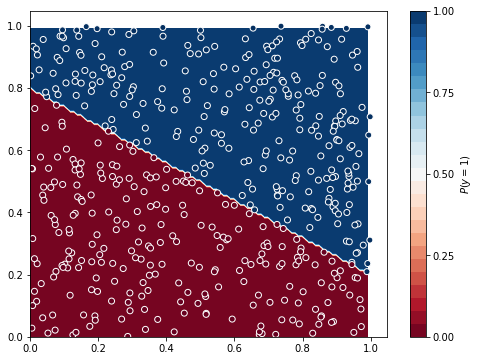

In [ ]:
plot_dec_boundary(classify)


De la même façon qu'un réseau de neurones a une seule couche peut faire de la regression il peut faire de la regression logistique.

La regression logistique consiste en une regression qui prédit une sigmoid, la fonction sigmoid est une fonction qui renvoie toujours quelque chose entre 0 et 1 et donc c'est un peu comme si on essayait de prédire la probabilité d'apparentance a une des deux classes.

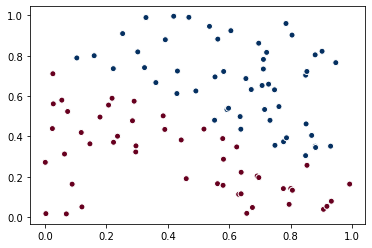

In [217]:
#Rappel voici nos points avec une belle frontière bien linéaire au milieu
plt.scatter(X[:,0],X[:,1],c = y, cmap="RdBu",edgecolor="white", linewidth=1)

In [218]:
class LogisticRegression(nn.Module):
  def __init__(self, n_in):
    super().__init__()
    self.l1 = nn.Linear(n_in, 1,bias = True)
    self.sigm = nn.Sigmoid()
  
  def forward(self, x):
    x = self.l1(x)
    return self.sigm(x)


  

In [220]:
X = np.random.random((10000,2))
y = np.where(X@frontiere - 4 > 0, 1, 0)

In [221]:
L = LogisticRegression(2)
X_tensor = torch.tensor(X).float()

In [222]:
y_tensor = torch.tensor(y).float().view((-1,))
y_tensor.shape

torch.Size([10000])

In [223]:
criterion = torch.nn.BCELoss(reduction="mean")

optimizer = torch.optim.SGD(L.parameters(), lr=9e-1)

for i in range(20000):
  pred = L(X_tensor).view((-1,))
  loss = criterion(pred,y_tensor)
  loss.backward()
  print(loss)
  optimizer.step()
  optimizer.zero_grad()
print(loss)

Streaming output truncated to the last 5000 lines.
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyBackwa

In [224]:
y[0:10]

array([[1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [225]:
L(torch.tensor(X[0:10]).float())

tensor([[9.9910e-01],
        [1.0000e+00],
        [1.6858e-04],
        [1.0000e+00],
        [1.4479e-01],
        [1.2934e-02],
        [1.3682e-02],
        [1.6176e-08],
        [1.3680e-04],
        [9.2297e-03]], grad_fn=<SigmoidBackward>)

In [232]:
pred = L(X_tensor).view((-1,))
(p

False

In [234]:
class DeepLogisticRegression(nn.Module):
  def __init__(self, n_in):
    super().__init__()
    self.relu = nn.ReLU()
    self.l1 = nn.Linear(n_in, 15,bias = True)
    self.l2 = nn.Linear(15,1)
    self.sigm = nn.Sigmoid()
  
  def forward(self, x):
    x = self.l1(x)
    x = self.relu(x)
    x = self.l2(x)
    return self.sigm(x)

accuracy_l = []
loss_l = []
L = DeepLogisticRegression(2)
criterion = torch.nn.BCELoss(reduction="mean")
optimizer = torch.optim.SGD(L.parameters(), lr=5e-1)
for i in range(5000):
  pred = L(X_tensor).view((-1,))
  loss = criterion(pred,y_tensor)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  accuracy = (pred > 0.5) == y_tensor
  accuracy_l.append(accuracy.detach().numpy().astype(int).mean())
  loss_l.append(loss.detach().numpy())

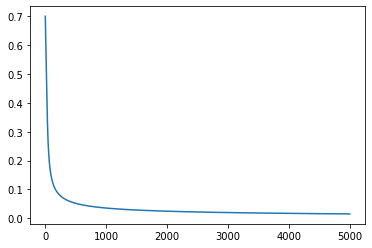

In [235]:
plt.plot(np.arange(len(loss_l)),loss_l)

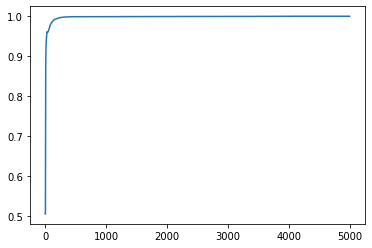

In [236]:
plt.plot(np.arange(len(accuracy_l)),accuracy_l)

# Introduction a l'optimisation d'un modèle pour la production

J'ai fini mon modèle, je fais quoi après ?

Dans mon cas, Jupyter Notebook (et Google Collab par extension) est surtout un outil de développement ou j'expérimente sur des petits ensembles de données, et ou je showoff des résultats pour mes promotteurs.

Quand on veut "deployer" un modèle ou l'évaluer dans un contexte de production (avec beaucoup de données), je prefère travailler en local ou a la rigueur sur une machine distante mais hors notebook (via le Bash).

In [ ]:
%%writefile model.py

import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torchviz import make_dot
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset

class Regression_DNN(nn.Module):
    def __init__(self, n_in ,lr = 1e-1):
        super().__init__()
        self.out = nn.Linear(n_in,1, bias = True)
        self.loss =  nn.MSELoss(reduction='mean')
        self.optimizer = torch.optim.Adam(self.parameters(), lr=lr)

               
    def forward(self, x):
      x  = x.float()
      x = self.out(x)
      return x

    def train_step(self,X,y):
      self.train() 
      p = self.forward(X.float())
      loss = self.loss(y.float().view((-1,)), p.view((-1,)))
      loss.backward()
      self.optimizer.step()
      self.optimizer.zero_grad()
      return loss

Overwriting model.py


In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
!rm -rf runs

In [ ]:
%%writefile train.py

import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torchviz import make_dot
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter
from model import Regression_DNN

tb = SummaryWriter()

X = np.linspace(-10,10,50).reshape((50,1))
X = torch.tensor(X).float()
y = 3*X + 5 + 1*np.random.normal(0,1,X.shape)
mod = Regression_DNN(1)
losses = []
for epoch in range(10000):
    loss = mod.train_step(X,y)
    losses.append(loss)
    if(epoch % 10 == 0):
      for name, weight in mod.named_parameters():
        tb.add_histogram(name,weight, epoch)
        tb.add_scalar('Loss',loss,epoch)

tb.add_graph(mod, X)
tb.flush()
tb.close()

Overwriting train.py


In [ ]:
!python train.py

2021-01-09 12:59:12.396110: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [ ]:
%reload_ext tensorboard

In [ ]:
%tensorboard --logdir "runs"

Reusing TensorBoard on port 6006 (pid 982), started 0:08:04 ago. (Use '!kill 982' to kill it.)

<IPython.core.display.Javascript object>

# Practice

In [289]:
from sklearn.datasets import load_boston
X,y = load_boston(return_X_y = True)
X = torch.tensor(X).float()
y = torch.tensor(y).float()

In [290]:
X.shape

torch.Size([506, 13])

In [291]:
y.reshape((-1,1)).shape

torch.Size([506, 1])

In [292]:
X[0]

tensor([6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01, 6.5750e+00,
        6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
        4.9800e+00])

In [293]:
y[0]

tensor(24.)

In [294]:
class Regression(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(13,1)

  def forward(self, x):
    return self.l1(x)

In [295]:
R = Regression()
R(X[0])

tensor([-30.5781], grad_fn=<AddBackward0>)

In [306]:
R = Regression()

optimizer = torch.optim.Adam(R.parameters(), lr = 1e-2)
mse_loss = nn.MSELoss(reduction='mean')

for i in range(10000):
  p = R(X)
  loss = mse_loss(p,y)
  if(i % 1000 == 0):
    print(loss)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([506])) that is different to the input size (torch.Size([506, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(9187.6504, grad_fn=<MseLossBackward>)
tensor(87.5251, grad_fn=<MseLossBackward>)
tensor(86.1367, grad_fn=<MseLossBackward>)
tensor(85.6062, grad_fn=<MseLossBackward>)
tensor(85.3676, grad_fn=<MseLossBackward>)
tensor(85.2413, grad_fn=<MseLossBackward>)
tensor(85.1191, grad_fn=<MseLossBackward>)
tensor(85.0022, grad_fn=<MseLossBackward>)
tensor(84.8937, grad_fn=<MseLossBackward>)
tensor(84.8249, grad_fn=<MseLossBackward>)


In [315]:
class Regression(nn.Module):
  def __init__(self):
    super().__init__()
    self.relu = nn.ReLU()
    self.l1 = nn.Linear(13,20)
    self.l2 = nn.Linear(20,16)
    self.out = nn.Linear(16,1)


  def forward(self, x):
    x = self.relu(self.l1(x))
    x = self.relu(self.l2(x))
    return self.out(x)

In [323]:
R = Regression()

optimizer = torch.optim.Adam(R.parameters(), lr = 1e-5)
mse_loss = nn.MSELoss(reduction='mean')

for i in range(40000):
  p = R(X)
  loss = mse_loss(p,y)
  if(i % 1000 == 0):
    print(loss)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([506])) that is different to the input size (torch.Size([506, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(1132.0559, grad_fn=<MseLossBackward>)
tensor(328.6566, grad_fn=<MseLossBackward>)
tensor(174.1277, grad_fn=<MseLossBackward>)
tensor(110.4301, grad_fn=<MseLossBackward>)
tensor(91.4537, grad_fn=<MseLossBackward>)
tensor(88.1774, grad_fn=<MseLossBackward>)
tensor(87.4993, grad_fn=<MseLossBackward>)
tensor(87.1900, grad_fn=<MseLossBackward>)
tensor(87.0054, grad_fn=<MseLossBackward>)
tensor(86.8386, grad_fn=<MseLossBackward>)
tensor(86.5752, grad_fn=<MseLossBackward>)
tensor(86.4072, grad_fn=<MseLossBackward>)
tensor(86.2383, grad_fn=<MseLossBackward>)
tensor(86.0480, grad_fn=<MseLossBackward>)
tensor(85.8675, grad_fn=<MseLossBackward>)
tensor(85.7107, grad_fn=<MseLossBackward>)


KeyboardInterrupt: ignored